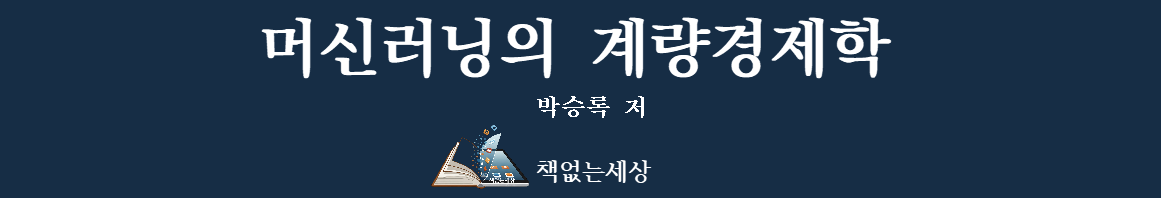

# Part 6: 패널 모형

## Chapter 1: 시계열 자료와 횡단면 자료의 혼용

In [2]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
os.getcwd()

'E:\\JupyterWDirectory\\MyStock'

In [4]:
exec(open('E:/JupyterWDirectory/MyStock/Functions/Traditional_Econometrics_Lib.py').read())

In [ ]:
"""
# #####################################################################
# 위의 함수는 아래 다양한 라이브러리와 함수를 한 문장으로 불러오는 방법
# #####################################################################

# 분석에 사용될 라이브러리(Libraries for the Analysis) 불러오기
# Libraries for the Analysis of Traditional Econometrics.py
# 불러오는 방법:  "exec(open('Functions/Traditional_Econometrics_Lib.py').read())"
# #####################################################################

# 만약 특정 라이브러리가 설치되지 않았다는 에러 메시지가 나타날 때는 
# 해당 라이브러리를 설치하여야 함
# 아래 라이브러리를 하나 하나 실행하면서 어떤 라이브러리가 설치되지 않았는지 확인하여도 됨
# #####################################################################
import os
import numpy as np                                       # Numerical calculations
import pandas as pd                                      # Data handling
import math as someAlias
import matplotlib.dates as mdates                        # Turn dates into numbers
import matplotlib.pyplot as plt                          # Lower-level graphics
import patsy as pt
import seaborn as sns
import stargazer.stargazer as sg
import statsmodels.api as sm
import statsmodels.formula.api as smf                    # Econometrics
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.outliers_influence as smo
import linearmodels as lm                                # Panel model, Simultaneous Eq. Model
import scipy.stats as stats                              # Statistics
import random

from scipy.optimize import Bounds
from scipy.optimize import curve_fit                    # Nonlinear regression
from scipy.optimize import minimize
from scipy.stats import norm
from statsmodels.graphics import tsaplots               # Time series
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller          # ADF test
from statsmodels.tsa.stattools import coint             # Cointegration
from statsmodels.tsa.vector_ar.vecm import VECM
from arch import arch_model

import wooldridge as woo
from imfpy.retrievals import dots
import wbdata
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")
"""\

### 4. 파이썬에서 횡단면 자료와 시계열 자료의 혼용자료
#### 가. 풀링 횡단면 자료: 더미 변수와 그 교차항 

#### 교육의 임금 효과, 성별 임금격차

A data.frame with 1084 observations on 15 variables:
* educ: years of schooling
* south: =1 if live in south
* nonwhite: =1 if nonwhite
* female: =1 if female
* married: =1 if married
* exper: age - educ - 6
* expersq: exper^2
* union: =1 if belong to union
* lwage: log hourly wage
* age: in years
* year: 78 or 85
* y85: =1 if year == 85
* y85fem: y85*female
* y85educ: y85*educ
* y85union: y85*union


In [5]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

df = woo.dataWoo('cps78_85')
print(df)
print(df.describe())
print(df.info())

# 연도 더미변수와의 교차항을 포함한 OLS
reg = smf.ols(formula='lwage ~ y85*(educ+female) + exper +'
                      'I(exper**2) + union',
              data=df)
results = reg.fit()
print(results.summary())


      educ  south  nonwhite  female  married  exper  expersq  union   lwage  \
0       12      0         0       0        0      8       64      0  1.2150   
1       12      0         0       1        1     30      900      1  1.6094   
2        6      0         0       0        1     38     1444      1  2.1401   
3       12      0         0       0        1     19      361      1  2.0732   
4       12      0         0       0        1     11      121      0  1.6490   
...    ...    ...       ...     ...      ...    ...      ...    ...     ...   
1079    12      0         1       1        1     18      324      0  2.1552   
1080    14      0         0       1        0     13      169      0  2.9178   
1081    18      0         0       0        1      8       64      0  3.1001   
1082    12      0         1       0        0     14      196      1  2.7887   
1083    12      0         0       0        0      9       81      0  2.9689   

      age  year  y85  y85fem  y85educ  y85union  
0

### 나. 차이의 차이(Difference in Difference: DID)
##### 쓰레기 처리장 위치와 주택가격

 A data.frame with 321 observations on 25 variables:
* year: 1978 or 1981
* age: age of house
* agesq: age^2
* nbh: neighborhood, 1-6
* cbd: dist. to cent. bus. dstrct, ft.
* intst: dist. to interstate, ft.
* lintst: log(intst)
* price: selling price
* rooms: # rooms in house
* area: square footage of house
* land: square footage lot
* baths: # bathrooms
* dist: dist. from house to incin., ft.
* ldist: log(dist)
* wind: prc. time wind incin. to house
* lprice: log(price)
* y81: =1 if year == 1981
* larea: log(area)
* lland: log(land)
* y81ldist: y81*ldist
* lintstsq: lintst^2
* nearinc: =1 if dist <= 15840
* y81nrinc: y81*nearinc
* rprice: price, 1978 dollars
* lrprice: log(rprice)


In [6]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

# DID
kielmc = woo.dataWoo('kielmc')

# 1978년과 1981년 분리하여 회귀분석
y78 = (kielmc['year'] == 1978)
reg78 = smf.ols(formula='rprice ~ nearinc', data=kielmc, subset=y78)
results78 = reg78.fit()
display(results78.summary())

y81 = (kielmc['year'] == 1981)
reg81 = smf.ols(formula='rprice ~ nearinc', data=kielmc, subset=y81)
results81 = reg81.fit()
display(results81.summary())

# 연도 더미 변수와의 교차항을 포함하는 회귀
reg_joint = smf.ols(formula='rprice ~ nearinc*C(year)', data=kielmc)
results_joint = reg_joint.fit()
display(results_joint.summary())

# DiD 모형
reg_did = smf.ols(formula='lrprice ~ nearinc*C(year)', data=kielmc)
results_did = reg_did.fit()
display(results_did.summary()) 

# 통제변수(control variables)를 가진 DID
formula= """lrprice ~ nearinc*C(year) + age + I(age**2) + np.log(intst) 
          + np.log(land) + np.log(area) + rooms + baths"""


reg_didC = smf.ols(formula=formula, data=kielmc)
results_didC = reg_didC.fit()
display(results_didC.summary()) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.74
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           0.000105
Time:                        12:55:05   Log-Likelihood:                -2094.9
No. Observations:                 179   AIC:                             4194.
Df Residuals:                     177   BIC:                             4200.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.252e+04   2653.790     31.094      0.000    7.73e+04    8.78e+04
nearinc    -1.882e+04   4744.594     -3.968      0.000   -2.82e+04   -9461.117
==============================================================================
Omnibus:                      173.455   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4526.710
Skew:                           3.520   Prob(JB):                         0.00
Kurtosis:                      26.609   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     27.73
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           5.14e-07
Time:                        12:55:05   Log-Likelihood:                -1670.1
No. Observations:                 142   AIC:                             3344.
Df Residuals:                     140   BIC:                             3350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.013e+05   3093.027     32.754      0.000    9.52e+04    1.07e+05
nearinc    -3.069e+04   5827.709     -5.266      0.000   -4.22e+04   -1.92e+04
==============================================================================
Omnibus:                       23.943   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.601
Skew:                           0.832   Prob(JB):                     4.15e-09
Kurtosis:                       4.939   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rprice   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     22.25
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           4.22e-13
Time:                        12:55:05   Log-Likelihood:                -3765.2
No. Observations:                 321   AIC:                             7538.
Df Residuals:                     317   BIC:                             7554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                8.252e+04   2726.910     30.260      0.000    7.72e+04    8.79e+04
C(year)[T.1981]          1.879e+04   4050.065      4.640      0.000    1.08e+04    2.68e+04
nearinc                 -1.882e+04   4875.322     -3.861      0.000   -2.84e+04   -9232.293
nearinc:C(year)[T.1981] -1.186e+04   7456.646     -1.591      0.113   -2.65e+04    2806.867
==============================================================================
Omnibus:                      192.562   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2462.071
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      15.822   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lrprice   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     34.47
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           2.62e-19
Time:                        12:55:05   Log-Likelihood:                -105.68
No. Observations:                 321   AIC:                             219.4
Df Residuals:                     317   BIC:                             234.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  11.2854      0.031    369.839      0.000      11.225      11.345
C(year)[T.1981]             0.1931      0.045      4.261      0.000       0.104       0.282
nearinc                    -0.3399      0.055     -6.231      0.000      -0.447      -0.233
nearinc:C(year)[T.1981]    -0.0626      0.083     -0.751      0.453      -0.227       0.102
==============================================================================
Omnibus:                       29.462   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.380
Skew:                           0.370   Prob(JB):                     4.75e-19
Kurtosis:                       5.400   Cond. No.                         6.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lrprice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     84.91
Date:                Tue, 22 Jul 2025   Prob (F-statistic):           1.24e-82
Time:                        12:55:05   Log-Likelihood:                 60.690
No. Observations:                 321   AIC:                            -99.38
Df Residuals:                     310   BIC:                            -57.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.6517      0.416     18.399      0.000       6.833       8.470
C(year)[T.1981]             0.1621      0.028      5.687      0.000       0.106       0.218
nearinc                     0.0322      0.047      0.679      0.498      -0.061       0.126
nearinc:C(year)[T.1981]    -0.1315      0.052     -2.531      0.012      -0.234      -0.029
age                        -0.0084      0.001     -5.924      0.000      -0.011      -0.006
I(age ** 2)              3.763e-05   8.67e-06      4.342      0.000    2.06e-05    5.47e-05
np.log(intst)              -0.0614      0.032     -1.950      0.052      -0.123       0.001
np.log(land)                0.0998      0.024      4.077      0.000       0.052       0.148
np.log(area)                0.3508      0.051      6.813      0.000       0.249       0.452
rooms                       0.0473      0.017      2.732      0.007       0.013       0.081
baths                       0.0943      0.028      3.400      0.001       0.040       0.149
==============================================================================
Omnibus:                       67.366   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              356.621
Skew:                          -0.734   Prob(JB):                     3.64e-78
Kurtosis:                       7.951   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Chapter 2: 패널 자료의 회귀분석

### 4. 패널 자료 처리를 위한 판다스 사용법

#### 가. 데이터의 결합

In [8]:
# 데이터프레임(Data Frame)의 결합(Append and Merge)
data_1 = {'id': [1, 2, 3, 4, 5],  
          'first': ['AA', 'BB', 'CC', 'DD', 'EE'],  'last': ['FF', 'GG', 'HH', 'II', 'JJ']}  
data_2 = {'id': [3, 4, 5, 6, 7],  'Sales': [100, 200, 300, 400, 500]}  

data_1 = pd.DataFrame(data_1)  
data_2 = pd.DataFrame(data_2)  

# 겹치는 ID만 결합
inner_join = pd.merge(data_1, data_2, on = 'id')  
display(inner_join)  

# 모든 ID 결합
outer_join = pd.merge(data_1, data_2, on = 'id', how = 'outer')  
display(outer_join)  

# 왼쪽 데이터프레임 기준
left_join = pd.merge(data_1, data_2, on = 'id', how = 'left')  
display(left_join)  

# 오른쪽 데이터프레임 기준
right_join = pd.merge(data_1, data_2, on = 'id', how = 'right')  
display(right_join) 

,id,first,last,Sales
0,3,CC,HH,100
1,4,DD,II,200
2,5,EE,JJ,300


,id,first,last,Sales
0,1,AA,FF,NaN
1,2,BB,GG,NaN
2,3,CC,HH,100.0
3,4,DD,II,200.0
4,5,EE,JJ,300.0
5,6,NaN,NaN,400.0
6,7,NaN,NaN,500.0


,id,first,last,Sales
0,1,AA,FF,NaN
1,2,BB,GG,NaN
2,3,CC,HH,100.0
3,4,DD,II,200.0
4,5,EE,JJ,300.0


,id,first,last,Sales
0,3,CC,HH,100
1,4,DD,II,200
2,5,EE,JJ,300
3,6,NaN,NaN,400
4,7,NaN,NaN,500


#### 나. 와이드 폼(wide form) ↔ 롱 폼(long form)

In [11]:
# Wide form --> long form : pd.wide_to_long
data = pd.read_csv('Data/wideform.csv')
print(data.head())

df = pd.wide_to_long(data, ["A", "B"], i="id", j="year")
df.sort_values(by=['id', 'year'], inplace=True)
print(df)

desc1 = df.groupby(level=0, axis=0).describe()
desc2 = df.groupby(level=1, axis=0).describe()

# ID별 평균에 대한 편차
df_mean = df.groupby(level=0, axis=0).transform('mean')
df_mean.columns = ['A_mean', 'B_mean']
print(df_mean)

# 왼쪽 데이터프레임 기준
df_join = pd.merge(df, df_mean, on = ['id', 'year'], how = 'left')  
print(df_join)  

# 기초 통계
desc = df_join.groupby(level=0, axis=0).describe().T
print(desc)


   id  A2020  A2021  A2022  A2023  A2024  B2020  B2021  B2022  B2023  B2024
0   1     11     29     28     50     27     24     30     24     25     36
1   2     20     33     34     33     49     30     18     21     36     19
2   3     39     24     11     40     21     50     26     47     47     46
3   4     13     15     37     11     22     14     41     50     16     34
4   5     37     49     50     17     23     12     30     24     35     27
          A   B
id year        
1  2020  11  24
   2021  29  30
   2022  28  24
   2023  50  25
   2024  27  36
2  2020  20  30
   2021  33  18
   2022  34  21
   2023  33  36
   2024  49  19
3  2020  39  50
   2021  24  26
   2022  11  47
   2023  40  47
   2024  21  46
4  2020  13  14
   2021  15  41
   2022  37  50
   2023  11  16
   2024  22  34
5  2020  37  12
   2021  49  30
   2022  50  24
   2023  17  35
   2024  23  27
6  2020  34  10
   2021  12  39
   2022  26  13
   2023  47  50
   2024  27  37
7  2020  16  50
   2021  38  32


In [10]:
# Long form --> Wide form : p pd.pivot_table
df_org = pd.pivot_table(df, index = ['id'], columns=['year'], values = ['A', 'B'], aggfunc='sum')
print(df_org)

df_org.columns = [''.join(map(str, col)) for col in df_org.columns.values]
df_org = df_org.reset_index()
print(df_org)

        A                        B                    
year 2020 2021 2022 2023 2024 2020 2021 2022 2023 2024
id                                                    
1      11   29   28   50   27   24   30   24   25   36
2      20   33   34   33   49   30   18   21   36   19
3      39   24   11   40   21   50   26   47   47   46
4      13   15   37   11   22   14   41   50   16   34
5      37   49   50   17   23   12   30   24   35   27
6      34   12   26   47   27   10   39   13   50   37
7      16   38   36   35   37   50   32   22   24   37
8      25   19   27   16   39   11   12   27   49   41
9      16   34   49   29   23   40   14   44   12   29
10     35   23   24   38   29   29   50   26   12   37
   id  A2020  A2021  A2022  A2023  A2024  B2020  B2021  B2022  B2023  B2024
0   1     11     29     28     50     27     24     30     24     25     36
1   2     20     33     34     33     49     30     18     21     36     19
2   3     39     24     11     40     21     50     26   

## 5. 파이썬에서 패널 모형의 추정
### 가. 혼용 회귀(Pooled Regression)
#### 1) 고전적 최소자승법

In [12]:
import wooldridge as woo
import pandas as pd
import linearmodels as plm

wagepan = woo.dataWoo('wagepan')
wagepan = wagepan.set_index(['nr', 'year'], drop=False)

df = wagepan[['nr', 'year', 'lwage', 'educ', 'exper', 'hours', 'married', 'union', 'south', 'hisp', 'black']]
print(df)

# 기초 통계
df_descID = df.groupby(level=0, axis=0).describe().T
print(df_descID)

df_descYR = df.groupby(level=1, axis=0).describe().T
print(df_descYR)

# OLS
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['educ', 'exper', 'exper2', 'hours', 'married', 'union', 'south', 'black']]
X = sm.add_constant(X)
Results_OLS = sm.OLS(y, X).fit()
print(Results_OLS.summary())

# Pooled OLS
Results_POOL = lm.panel.PooledOLS(y, X).fit() 
print(Results_POOL)

               nr  year     lwage  educ  exper  hours  married  union  south  \
nr    year                                                                     
13    1980     13  1980  1.197540    14      1   2672        0      0      0   
      1981     13  1981  1.853060    14      2   2320        0      1      0   
      1982     13  1982  1.344462    14      3   2940        0      0      0   
      1983     13  1983  1.433213    14      4   2960        0      0      0   
      1984     13  1984  1.568125    14      5   3071        0      0      0   
...           ...   ...       ...   ...    ...    ...      ...    ...    ...   
12548 1983  12548  1983  1.591879     9      8   2080        1      0      1   
      1984  12548  1984  1.212543     9      9   2080        1      1      1   
      1985  12548  1985  1.765962     9     10   2080        1      0      1   
      1986  12548  1986  1.745894     9     11   2080        1      1      1   
      1987  12548  1987  1.466543     9 

#### 2) 계체 간 추정(Between OLS Estimation)

In [13]:
# BetweenOLS Estimation
Results_BETWEEN = lm.panel.BetweenOLS(y, X).fit() 
print(Results_BETWEEN)

                         BetweenOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.2248
Estimator:                 BetweenOLS   R-squared (Between):              0.2248
No. Observations:                 545   R-squared (Within):               0.0412
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.1399
Time:                        15:44:49   Log-likelihood                   -191.29
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      19.431
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                   F(8,536)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             19.431
                            

#### 3) 일계 차분 모형(First Differenced Model Estimator)

In [14]:
# FirstDifferenceOLS Estimation: 개체내 불변변수, 상수항 제외되어야
y = df['lwage']
X = df[['exper', 'exper2', 'hours', 'married', 'union', 'south']]
Results_FD = lm.panel.FirstDifferenceOLS(y, X).fit() 
print(Results_FD)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                  lwage   R-squared:                        0.0859
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.2506
No. Observations:                3815   R-squared (Within):               0.1886
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.2479
Time:                        15:45:23   Log-likelihood                   -2185.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      59.663
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,3809)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             59.663
                            

#### 4) 개체 내 추정(Within OLS Estimation)

In [15]:
# 개체 내 평균과의 차이: FD의 독립변수와 동일
y_w = y - y.groupby(level=0, axis=0).transform('mean')
X_w = X - X.groupby(level=0, axis=0).transform('mean')

Results_WITHIN = lm.panel.PooledOLS(y_w, X_w).fit() 
print(Results_WITHIN) 

                          PooledOLS Estimation Summary                          
Dep. Variable:                  lwage   R-squared:                        0.2003
Estimator:                  PooledOLS   R-squared (Between):              0.0000
No. Observations:                4360   R-squared (Within):               0.2003
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.2003
Time:                        15:46:20   Log-likelihood                   -1271.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      181.80
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,4354)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             181.80
                            

### 나. 고정효과 모형(Fixed Effects: FE)
#### 1) One-way Fixed Effects

In [18]:
# One-way Fixed Effects
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['exper', 'exper2', 'hours', 'married', 'union', 'south']]
X = sm.add_constant(X)

Results_FE1 = lm.panel.PanelOLS(y, X, entity_effects=True).fit()  
print(Results_FE1) 
print(Results_FE1.estimated_effects.head(10))

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.2003
Estimator:                   PanelOLS   R-squared (Between):             -0.1221
No. Observations:                4360   R-squared (Within):               0.2003
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.0271
Time:                        15:54:11   Log-likelihood                   -1271.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      159.04
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(6,3809)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             159.04
                            

#### 2) Two-way Fixed Effects

In [17]:
y = df['lwage']
X = df[['hours', 'married', 'union', 'south']]

# Two-way Fixed Effects
Results_FE2 = lm.panel.PanelOLS(y, X, entity_effects=True, time_effects=True).fit()  
print(Results_FE2) 
print(Results_FE2.estimated_effects.head(10))

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.0291
Estimator:                   PanelOLS   R-squared (Between):             -0.2118
No. Observations:                4360   R-squared (Within):               0.0098
Date:                Tue, Jul 22 2025   R-squared (Overall):             -0.2021
Time:                        15:54:07   Log-likelihood                   -1308.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      28.476
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(4,3804)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             28.476
                            

### 다. 확률효과 모형(Random Effects: RE)

In [19]:
# Random Effects(RE)
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['educ', 'exper', 'exper2', 'hours', 'married', 'union', 'south', 'black']]
X = sm.add_constant(X)
Results_RE = lm.panel.RandomEffects(y, X).fit()  
print(Results_RE) 

                        RandomEffects Estimation Summary                        
Dep. Variable:                  lwage   R-squared:                        0.1948
Estimator:              RandomEffects   R-squared (Between):              0.1702
No. Observations:                4360   R-squared (Within):               0.1983
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.1832
Time:                        15:56:38   Log-likelihood                   -1582.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      131.56
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(8,4351)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             131.56
                            

### 라. 파라미터의 공분산 추정치(강건 표준오차)
#### 1) 혼용 회귀에서 강건 표준오차

In [20]:
# Robust Standard errors using OLS and Linearmodels
# 혼용회귀
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['educ', 'exper', 'exper2', 'hours', 'married', 'union', 'south', 'black']]
X = sm.add_constant(X)

# 단순 OLS 
Results_pooled_ols = lm.panel.PooledOLS(y, X).fit()

# 이분산 문제(Using White standard errors)
Results_pooled_hec = lm.panel.PooledOLS(y, X).fit(cov_type='heteroskedastic')

# 자기상관 문제(Using Cluster standard errors)
Results_pooled_clu = lm.panel.PooledOLS(y, X).fit(cov_type='clustered', cluster_entity=True)

# 이분산 & 자기상관 문제(Using Driscoll Kraay standard errors)
Results_pooled_dk = lm.panel.PooledOLS(y, X).fit(cov_type='kernel')

# Comparing standard errors and confidence intervals 
print(Results_pooled_ols.summary.tables[1]) 
print(Results_pooled_hec.summary.tables[1]) 
print(Results_pooled_clu.summary.tables[1]) 
print(Results_pooled_dk.summary.tables[1])

                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.1097     0.0662     1.6556     0.0979     -0.0202      0.2395
educ           0.0989     0.0046     21.513     0.0000      0.0899      0.1079
exper          0.0975     0.0102     9.5703     0.0000      0.0775      0.1175
exper2        -0.0033     0.0007    -4.6109     0.0000     -0.0047     -0.0019
hours      -7.208e-05  1.339e-05    -5.3848     0.0000  -9.832e-05  -4.583e-05
married        0.1228     0.0158     7.7681     0.0000      0.0918      0.1538
union          0.1719     0.0171     10.063     0.0000      0.1384      0.2054
south         -0.0501     0.0155    -3.2277     0.0013     -0.0805     -0.0197
black         -0.1328     0.0235    -5.6501     0.0000     -0.1789     -0.0867
                             Parameter Estimates    

#### 2) 고정효과 모형에서 강건 표준오차

In [21]:
# 고정효과 모형(One-way Fixed Effects)
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['exper', 'exper2', 'hours', 'married', 'union', 'south']]
X = sm.add_constant(X)

# 단순 OLS 
Results_FE1_ols = lm.panel.PanelOLS(y, X).fit()

# 이분산 문제(Using White standard errors)
Results_FE1_hec = lm.panel.PanelOLS(y, X).fit(cov_type='heteroskedastic')

# 자기상관 문제(Using Cluster standard errors)
Results_FE1_clu = lm.panel.PanelOLS(y, X).fit(cov_type='clustered', cluster_entity=True)

# 이분산 & 자기상관 문제(Using Driscoll Kraay standard errors)
Results_FE1_dk = lm.panel.PanelOLS(y, X).fit(cov_type='kernel')

# Comparing standard errors and confidence intervals 
print(Results_FE1_ols.summary.tables[1]) 
print(Results_FE1_hec.summary.tables[1]) 
print(Results_FE1_clu.summary.tables[1]) 
print(Results_FE1_dk.summary.tables[1])

                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          1.2434     0.0422     29.466     0.0000      1.1606      1.3261
exper          0.1210     0.0107     11.351     0.0000      0.1001      0.1420
exper2        -0.0067     0.0007    -9.2009     0.0000     -0.0081     -0.0053
hours      -5.807e-05   1.41e-05    -4.1174     0.0000  -8.573e-05  -3.042e-05
married        0.1716     0.0164     10.486     0.0000      0.1395      0.2037
union          0.1535     0.0179     8.5841     0.0000      0.1185      0.1886
south         -0.0885     0.0161    -5.5099     0.0000     -0.1200     -0.0570
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------

#### 3) 확률효과 모형에서 강건 표준오차

In [22]:
# 확률효과 모형(Random Effects)
df['exper2'] = df['exper']**2
y = df['lwage']
X = df[['educ', 'exper', 'exper2', 'hours', 'married', 'union', 'south', 'black']]
X = sm.add_constant(X)

# 단순 OLS 
Results_RE_ols = lm.panel.RandomEffects(y, X).fit()

# 이분산 문제(Using White standard errors)
Results_RE_hec = lm.panel.RandomEffects(y, X).fit(cov_type='heteroskedastic')

# 자기상관 문제(Using Cluster standard errors)
Results_RE_clu = lm.panel.RandomEffects(y, X).fit(cov_type='clustered', cluster_entity=True)

# 이분산 & 자기상관 문제(Using Driscoll Kraay standard errors)
Results_RE_dk = lm.panel.RandomEffects(y, X).fit(cov_type='kernel')

# Comparing standard errors and confidence intervals 
print(Results_RE_ols.summary.tables[1]) 
print(Results_RE_hec.summary.tables[1]) 
print(Results_RE_clu.summary.tables[1]) 
print(Results_RE_dk.summary.tables[1])

                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.0739     0.1089     0.6781     0.4977     -0.1397      0.2874
educ           0.1027     0.0087     11.754     0.0000      0.0855      0.1198
exper          0.1294     0.0084     15.458     0.0000      0.1130      0.1458
exper2        -0.0049     0.0006    -8.2968     0.0000     -0.0061     -0.0038
hours         -0.0001   1.27e-05    -9.4648     0.0000     -0.0001  -9.528e-05
married        0.0683     0.0166     4.1032     0.0000      0.0356      0.1009
union          0.0999     0.0177     5.6499     0.0000      0.0652      0.1345
south         -0.0051     0.0270    -0.1884     0.8506     -0.0580      0.0478
black         -0.1499     0.0474    -3.1601     0.0016     -0.2428     -0.0569
                             Parameter Estimates    

### 마. 하우스만 검정(Hausman test)

### 마. 하우스만 검정(Hausman test)

In [24]:
import wooldridge as woo
import numpy as np
import linearmodels as plm
import scipy.stats as stats

wagepan = woo.dataWoo('wagepan')
wagepan = wagepan.set_index(['nr', 'year'], drop=False)

# FE와 RE 추정
Results_FE = plm.PanelOLS.from_formula(formula='lwage ~ I(exper**2) + married +'
                                           'union + C(year) + EntityEffects',
                                       data=wagepan).fit()
print(Results_FE)

Results_RE = plm.RandomEffects.from_formula(
            formula='lwage ~ educ + black + hisp + exper + I(exper**2)'
                         '+ married + union + C(year)', data=wagepan).fit()
print(Results_RE)

# (1) 공통 파라미터 정의 
C_coef = list(set(Results_FE.params.index).intersection(Results_RE.params.index))

# (2) FE and RE 파라미터 추정치의 차이
D_b = np.array(Results_FE.params[C_coef] - Results_RE.params[C_coef])
dof = len(D_b)
D_b.reshape((dof, 1))

# (3) FE and RE 파라미터 공분산 행렬의 차이
D_cov = np.array(Results_FE.cov.loc[C_coef, C_coef] -
                 Results_RE.cov.loc[C_coef, C_coef])
D_cov.reshape((dof, dof))

# (4) Chi2 통계량 계산
Chi2 = abs(np.transpose(D_b) @ np.linalg.inv(D_cov) @ D_b)
pvalue = 1 - stats.chi2.cdf(Chi2, dof)

print(Chi2, dof, pvalue)

# 함수이용
exec(open('E:/JupyterWDirectory/MyStock/Functions/HausmanTest.py').read())
H, dof, pvalue = HausmanTest(Results_FE, Results_RE)
print(H, dof, pvalue)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  lwage   R-squared:                        0.1806
Estimator:                   PanelOLS   R-squared (Between):             -0.0052
No. Observations:                4360   R-squared (Within):               0.1806
Date:                Tue, Jul 22 2025   R-squared (Overall):              0.0807
Time:                        16:00:26   Log-likelihood                   -1324.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      83.851
Entities:                         545   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(10,3805)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             8850.2
                            

### 바. 문락 검정(Mundlak test)

In [25]:
import wooldridge as woo
import numpy as np
import pandas as pd
import linearmodels as lm
import scipy.stats as stats

wagepan = woo.dataWoo('wagepan')
#wagepan = wagepan.set_index(['nr', 'year'], drop=True)
print(wagepan) 
df_m = wagepan.groupby('nr').mean()                         
df = wagepan.merge(df_m, on = 'nr', how = 'left')      
print(df)
df.info()

df = df.set_index(['nr', 'year_x'], drop=True) 
print(df)
formula = """lwage_x ~ 1 + educ_x + exper_x + expersq_x + 
             black_x + south_x + union_x + exper_y + expersq_y + 
             south_y + union_y""" 

hnull = ['exper_y = 0.0', 'expersq_y = 0.0', 'south_y = 0.0', 'union_y = 0.0']
               
# 확률효과 모형
Results_RE = lm.RandomEffects.from_formula(formula, df).fit()  
# Mundlak stat. 
Mundlak_RE = Results_RE.wald_test(formula = hnull)   
print(Mundlak_RE)

# 확률효과 모형(Robust)
Results_RECL = lm.RandomEffects.from_formula(formula, df).fit(cov_type = 'clustered')

# Mundlak stat.
Mundlak_RECL = Results_RECL.wald_test(formula = hnull)     
print(Mundlak_RECL)

         nr  year  agric  black  bus  construc  ent  exper  fin  hisp  ...  \
0        13  1980      0      0    1         0    0      1    0     0  ...   
1        13  1981      0      0    0         0    0      2    0     0  ...   
2        13  1982      0      0    1         0    0      3    0     0  ...   
3        13  1983      0      0    1         0    0      4    0     0  ...   
4        13  1984      0      0    0         0    0      5    0     0  ...   
...     ...   ...    ...    ...  ...       ...  ...    ...  ...   ...  ...   
4355  12548  1983      0      0    0         1    0      8    0     0  ...   
4356  12548  1984      0      0    0         1    0      9    0     0  ...   
4357  12548  1985      0      0    0         1    0     10    0     0  ...   
4358  12548  1986      0      0    0         0    0     11    0     0  ...   
4359  12548  1987      0      0    0         0    0     12    0     0  ...   

      union     lwage  d81  d82  d83  d84  d85  d86  d87  exper

### 사. 패널 도구 추정법

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from statsmodels.sandbox.regression.gmm import IV2SLS

# Read CSV file
data = pd.read_csv('Data/psidextract.csv', parse_dates=['t'], index_col=['id', 't'])
print(data)

# Define variables
y  = data['lwage']
X1 = data[["occ", "south", "smsa", "ind"]]
X2 = data[["exp", "exp2", "wks", "ms", "union"]]
Z1 = data[["fem", "blk"]]
Z2 = data["ed"]
print(X1, X2, Z1, Z2)

# 함수이용
exec(open('Functions/HausmanTaylor.py').read())
HausmanTaylor(y, X1, X2, Z1, Z2)

         lwage  occ  south  smsa  ind  exp  exp2  wks  ms  union  fem  blk  ed
id  t                                                                         
1   1  5.56068    0      1     0    0    3     9   32   1      0    0    0   9
    2  5.72031    0      1     0    0    4    16   43   1      0    0    0   9
    3  5.99645    0      1     0    0    5    25   40   1      0    0    0   9
    4  5.99645    0      1     0    0    6    36   39   1      0    0    0   9
    5  6.06146    0      1     0    1    7    49   42   1      0    0    0   9
...        ...  ...    ...   ...  ...  ...   ...  ...  ..    ...  ...  ...  ..
595 3  5.95324    0      0     1    0    3     9   50   0      0    1    0  12
    4  6.06379    0      0     1    0    4    16   49   0      0    1    0  12
    5  6.21461    0      0     1    0    5    25   50   0      0    1    0  12
    6  6.29157    0      0     1    0    6    36   50   0      0    1    0  12
    7  6.37161    0      0     1    0    7    49   5

[]

### 아. 아렐라노-본드 추정법(Arellano-Bond Estimator)

In [30]:
!pip install pydynpd
import pandas as pd
import numpy as np
from  pydynpd import regression

# 데이터 읽어들이기
data = pd.read_csv("Data/ABond.csv",
       usecols = ['id', 'year', 'emp', 'wage', 'cap', 'yr1976', 'yr1977',
       'yr1978', 'yr1979', 'yr1980', 'yr1981', 'yr1982', 'yr1983', 'yr1984'])

# 변수의 로그변환
data['ln_emp'] = np.log(data['emp']) 
data['ln_wag'] = np.log(data['wage']) 
data['ln_cap'] = np.log(data['cap']) 
data.reset_index(drop=True)
display(data)

# 1) 단순한 모형
equation = 'ln_emp L1.ln_emp L2.ln_emp ln_wag ln_cap | gmm(ln_emp, 2:3) gmm(ln_wag, 1:.) iv(ln_cap)'
Model_AB = regression.abond(equation, data, ['id', 'year'])

equation2 = 'ln_emp  L(1:2).ln_emp  ln_wag  ln_cap | gmm(ln_emp, 2:3) gmm(ln_wag, 1:.) iv(ln_cap)'
Model_AB = regression.abond(equation2, data, ['id', 'year'])

# 2) 대변수 조정
equation3 = 'ln_emp L1.ln_emp ln_wag ln_cap | gmm(ln_wag ln_cap, 1:.)'
Model_AB = regression.abond(equation3, data, ['id', 'year'])

equation4 ='ln_emp L1.ln_emp ln_wag ln_cap | gmm(ln_emp, 2:3) pred(ln_wag ln_cap)'
Model_AB = regression.abond(equation4, data, ['id', 'year'])

# 3) 추정 방법 지정
equation5 ='ln_emp L1.ln_emp ln_wag ln_cap | endo(ln_emp) pred(ln_wag ln_cap) | onestep nolevel'
mydpd = regression.abond(equation5, data, ['id', 'year'])

# 4) 시간더미
equation6 ='ln_emp L1.ln_emp ln_wag ln_cap | endo(ln_emp) pred(ln_wag ln_cap) | onestep nolevel timedumm'
mydpd = regression.abond(equation6, data, ['id', 'year'])

# 5) 대변수 축소 
equation7 ='ln_emp L1.ln_emp ln_wag ln_cap | gmm(ln_emp, 2:4) pred(ln_wag ln_cap) | onestep nolevel timedumm'
mydpd = regression.abond(equation7, data, ['id', 'year'])

equation8 ='ln_emp L1.ln_emp ln_wag ln_cap | endo(ln_emp) pred(ln_wag ln_cap) | onestep nolevel timedumm collapse'
mydpd = regression.abond(equation8, data, ['id', 'year'])

# 6) 변수선정 자동화
equation9 ='ln_emp L(1:?).ln_emp ln_wag ln_cap | gmm(ln_emp, 2:3) pred(ln_wag ln_cap)'
mydpd = regression.abond(equation9, data, ['id', 'year'])

equation10 ='ln_emp L1.ln_emp L2.ln_emp L3.ln_emp ln_wag ln_cap | gmm(ln_emp, 2:3) pred(ln_wag ln_cap)'
mydpd = regression.abond(equation10, data, ['id', 'year'])

equation11 = 'ln_emp L(1:?).ln_emp ln_wag L1.ln_wag L2.ln_wag L(3:?).ln_wag ln_cap | gmm(ln_emp, 2:3) pred(ln_wag ln_cap) | hqic'
mydpd = regression.abond(equation11, data, ['id', 'year'])

  Using cached pydynpd-0.2.1-py3-none-any.whl.metadata (12 kB)
  Using cached prettytable-3.16.0-py3-none-any.whl.metadata (33 kB)
Using cached pydynpd-0.2.1-py3-none-any.whl (26 kB)
Using cached prettytable-3.16.0-py3-none-any.whl (33 kB)


,year,emp,wage,cap,id,yr1976,yr1977,yr1978,yr1979,yr1980,yr1981,yr1982,yr1983,yr1984,ln_emp,ln_wag,ln_cap
0,1977,5.041,13.151600,0.5894,1,0,1,0,0,0,0,0,0,0,1.617604,2.576543,-0.528650
1,1978,5.600,12.301800,0.6318,1,0,0,1,0,0,0,0,0,0,1.722767,2.509746,-0.459182
2,1979,5.015,12.839500,0.6771,1,0,0,0,1,0,0,0,0,0,1.612433,2.552526,-0.389936
3,1980,4.715,13.803900,0.6171,1,0,0,0,0,1,0,0,0,0,1.550749,2.624951,-0.482724
4,1981,4.093,14.289700,0.5076,1,0,0,0,0,0,1,0,0,0,1.409278,2.659539,-0.678062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1980,1.401,28.277201,0.5936,140,0,0,0,0,1,0,0,0,0,0.337186,3.342056,-0.521550
1027,1981,1.330,30.427401,0.4754,140,0,0,0,0,0,1,0,0,0,0.285179,3.415344,-0.743599
1028,1982,1.192,30.556499,0.4203,140,0,0,0,0,0,0,1,0,0,0.175633,3.419577,-0.866787
1029,1983,1.136,30.866100,0.3697,140,0,0,0,0,0,0,0,1,0,0.127513,3.429659,-0.995063


 Dynamic panel-data estimation, two-step system GMM
 Group variable: id                               Number of obs = 611     
 Time variable: year                              Min obs per group: 4    
 Number of instruments = 61                       Max obs per group: 6    
 Number of groups = 140                           Avg obs per group: 4.36 
+-----------+------------+---------------------+------------+-----------+-----+
|   ln_emp  |   coef.    | Corrected Std. Err. |     z      |   P>|z|   |     |
+-----------+------------+---------------------+------------+-----------+-----+
| L1.ln_emp | 0.9419690  |      0.1520193      | 6.1963781  | 0.0000000 | *** |
| L2.ln_emp | -0.0641473 |      0.1106139      | -0.5799210 | 0.5619679 |     |
|   ln_wag  | -0.5047741 |      0.1657322      | -3.0457206 | 0.0023212 |  ** |
|   ln_cap  | 0.1087514  |      0.0513892      | 2.1162316  | 0.0343251 |  *  |
|    _con   | 1.7119125  |      0.5527025      | 3.0973491  | 0.0019526 |  ** |
+-------